In [1]:
import pandas as pd
import numpy as np

from glob import glob
from experiments_to_run import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

paths = glob("../results/predictions*.pickle")

df = []
for path in paths:
    tmp_df = pd.read_pickle(path)
    df.append(tmp_df)
df = pd.concat(df)

figure exported to ../results/trends_with_margins_RF_CS.[png/pdf]
figure exported to ../figures_and_tables/figure_comparison_real_predicted_data_RF_CS.png


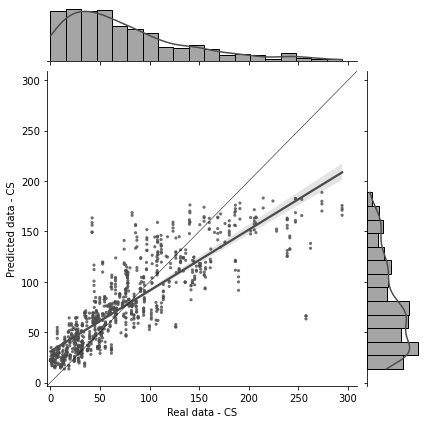

figure exported to ../results/trends_with_margins_RF_CSE.[png/pdf]
figure exported to ../figures_and_tables/figure_comparison_real_predicted_data_RF_CSE.png


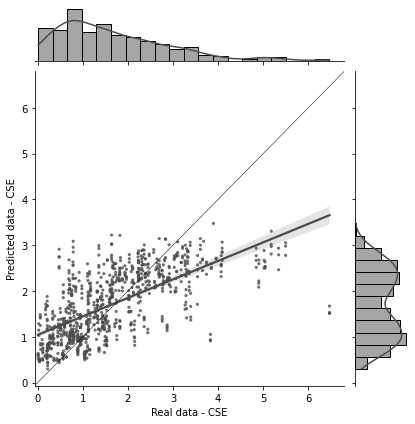

In [2]:
for TARGET in TARGETS:
        
    data = df[
        (df.model=="RF") &\
        (df.config=="Conf3") &\
        (df.target==TARGET)
    ]

    test = np.concatenate(data.y_test.values.tolist())
    pred = np.concatenate(data.y_pred.values.tolist())

    data_df = pd.DataFrame({"test":test, "pred":pred})

    axs = sns.jointplot(
        data=data_df,
        x='test',
        y='pred',
        color=".3",
        kind="reg",
        joint_kws=dict(scatter_kws=dict(s=10,ec=None,)),
    )
    
    ax = axs.ax_joint

    ax.set(
        xlabel='Real data - '+TARGET,
        ylabel='Predicted data - '+TARGET,
    )

    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    maxval = max(xlims[1], ylims[1])

    ax.plot([-maxval/100,maxval], [-maxval/100,maxval], color="k", lw=.5)

    ax.set_xlim((-maxval/100, maxval))
    ax.set_ylim((-maxval/100, maxval))
    
    ax.set_xlabel("Real data - "+TARGET)
    ax.set_ylabel("Predicted data - "+TARGET)
    
    plt.savefig(f"../results/trends_with_margins_RF_{TARGET}.png", facecolor='white', bbox_inches='tight', dpi=300)
    plt.savefig(f"../results/trends_with_margins_RF_{TARGET}.pdf", bbox_inches='tight', dpi=300)
    print("figure exported to", f"../results/trends_with_margins_RF_{TARGET}.[png/pdf]")
    
    plt.savefig(f"../figures_and_tables/figure_comparison_real_predicted_data_RF_{TARGET}.png", facecolor='white', bbox_inches='tight', dpi=300)
    print("figure exported to", f"../figures_and_tables/figure_comparison_real_predicted_data_RF_{TARGET}.png")

    plt.show()